In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [106]:
scores_phase = pd.read_csv('../data/ec109_mismatch_old_match_old_phase_scores.csv')

In [7]:
un_scores = pd.read_csv('../data/ec109_mismatch_old_match_old_phase_scoresUN.csv')

In [145]:
un_scores.real_auc.mean()
scores_phase.real_auc.mean()

0.6109295064991268

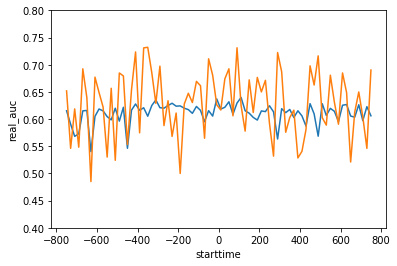

In [143]:
fig, ax = plt.subplots()
sns.lineplot(x='starttime', y='real_auc', data=scores_phase)
sns.lineplot(x='starttime', y='real_auc', data=un_scores)

ax.set_ylim([.4,.8])
plt.savefig('../data/nestedvsunnestedphase.png')

In [12]:
df = pd.read_csv('../data/mismatch_old_behav_ec109.csv')

In [16]:
colstodrop

['view1', 'view2', 'view3', 'response']

In [17]:
df['class']=df['view1']-df['view3']
colstodrop = [f'view{x}' for x in range(1,4)]+['response']
df2 = df.drop(colstodrop, axis=1)
df2

,events,blockno,elecs,freqs,time,pow,phase,class
0,1,1,1,1,1,2.464962,-2.040536,0.474289
1,2,1,1,1,1,1.908404,0.780263,0.540190
2,3,1,1,1,1,2.826254,-2.122290,0.547678
3,4,1,1,1,1,3.198254,-0.158317,0.478283
4,5,1,1,1,1,2.411878,-1.748016,0.445831
5,6,1,1,1,1,2.925027,-2.871871,0.445831
6,7,1,1,1,1,3.337881,-0.128805,0.445831
7,8,1,1,1,1,3.220212,1.400337,-0.018472
8,9,1,1,1,1,2.966633,-0.393934,0.065901
9,10,1,1,1,1,3.334894,2.141364,0.065901


In [18]:
def normalize_data(df, keep_pow, keep_phase):
    # z-score within block
    gb = df.groupby(['elecs', 'freqs', 'blockno'])
    if keep_pow:
        df['zpow'] = gb['pow'].apply(zscore)
    if keep_phase:
        df['sin'] = gb['phase'].apply(np.sin)
        df['cos'] = gb['phase'].apply(np.cos)

    df.drop(['pow', 'phase'], inplace=True, axis=1)
    return df

def zscore(x):
    ''' computes z score on value within a series of data '''
    z = (x - np.mean(x)) / np.std(x)
    return z
def downsample_timeseries(timearray, newsamplerate):
    alltimes = timearray.time.unique()
    times_to_keep = alltimes[0:len(alltimes):newsamplerate]
    downsampled = timearray.set_index('time')
    downsampled = downsampled.loc[times_to_keep,:]
    downsampled = downsampled.reset_index()
    return downsampled

def gen_wide_df(df, f_idx, t_idx):
    """

    :param df:
    :param f_idx:
    :param t_idx:
    :return: df
    """

    df = df.loc[(df['time'].isin(t_idx)) & (df['freqs'].isin(f_idx))]

    df = pd.pivot_table(df,
                        index=['class', 'blockno', 'events'],
                        columns=['elecs', 'freqs', 'time'],
                        aggfunc=[lambda x: x])

    # elecs = df.columns.get_level_values('elecs')
    # freqs = df.columns.get_level_values('freqs')
    # time = df.columns.get_level_values('time')
    # ncol = len(elecs)
    df.reset_index(drop=False, inplace=True)
    return df

In [19]:
df_norm = normalize_data(df2, keep_pow=False, keep_phase=True)

In [20]:
df_ds = downsample_timeseries(df_norm, 10)

In [23]:
dfwide = gen_wide_df(df_ds, [1,11], [1,2,3,4])

In [24]:
dfwide

class blockno events  <lambda>                                \
                                     cos                                 
elecs                                  1                   2             
freqs                                  1        11         1        11   
time                                   1         1         1         1   
0     -0.599601       1     89  0.189577 -0.251960  0.553067  0.337108   
1     -0.336995       1    111  0.998432  0.552915 -0.422373  0.337664   
2     -0.336995       1    112  0.809951 -0.284924 -0.170918  0.999640   
3     -0.304044       1     61  0.124723  0.305296 -0.050368 -0.992399   
4     -0.272591       1     60 -0.705531 -0.035253 -0.828192 -0.678839   
5     -0.228158       1     88 -0.999851  0.949364 -0.400328 -0.854495   
6     -0.165751       1    106 -0.947345  0.858794  0.144682  0.999097   
7     -0.140290       1     37  0.999990 -0.763992  0.954972 -0.660727   
8     -0.136296       1     50  0.551608 -0.547628  0.999284  0.913231   
9     -0.128308       1    104 -0.761033 -0.965191 -0.576096 -0.784271   
10    -0.123814       1     28  0.599964 -0.504165  0.250646 -0.070202   
11    -0.121817       1    105  0.983270  0.966100  0.205001 -0.998565   
12    -0.115826       1    103 -0.808532  0.275787 -0.910720  0.179269   
13    -0.114828       1     80 -0.370253  0.833643 -0.643000  0.998601   
14    -0.114828       1     81  0.220523  0.833530  0.973671  0.922383   
15    -0.113829       1     15  0.247173  0.569726  0.964035 -0.169793   
16    -0.113829       1     16  0.550102  0.963860 -0.848719  0.725678   
17    -0.113829       1     17 -0.146801 -0.304332  0.910870  0.849240   
18    -0.099850       1     49 -0.747459  0.268339 -0.995259 -0.746184   
19    -0.098852       1     36 -0.878378 -0.998389 -0.972411 -0.946666   
20    -0.092361       1     84 -0.581774  0.071155  0.582844 -0.999544   
21    -0.090864       1    109 -0.990808  0.736306 -0.929942  0.878576   
22    -0.082376       1     27 -0.215312 -0.606550 -0.020441 -0.734892   
23    -0.079880       1    110 -0.997507  0.746207 -0.448314  0.791298   
24    -0.072891       1    102  0.998054  0.224090  0.290119 -0.709535   
25    -0.058912       1     91 -0.594473 -0.947498 -0.526050 -0.880696   
26    -0.047928       1     83  0.906590 -0.069486 -0.994279 -0.870133   
27    -0.045432       1     48 -0.486306 -0.814288  0.583870 -0.713906   
28    -0.031453       1    101 -0.907564  0.379232  0.829640 -0.645698   
29    -0.020469       1     58  0.822038  0.726857  0.675528  0.143019   
..          ...     ...    ...       ...       ...       ...       ...   
87     0.302047       1     69 -0.946542  0.097508  0.998064  0.883292   
88     0.302047       1     70  0.019150  0.647892 -0.979822  0.980801   
89     0.302047       1     71 -0.981037  0.740065  0.528101  0.125488   
90     0.340489       1     21  0.999927  0.885332  0.556320  0.969612   
91     0.369446       1     22 -0.913685  0.709168 -0.149543  0.890385   
92     0.376435       1     23 -0.932287  0.364737  0.250500  0.271287   
93     0.445831       1      5 -0.176294  0.068477  0.930630  0.093225   
94     0.445831       1      6 -0.963845  0.174479 -0.247231  0.992893   
95     0.445831       1      7  0.991716  0.252029  0.138212  0.999877   
96     0.456316       1     38 -0.483581  0.693096 -0.691533 -0.536425   
97     0.474289       1      1 -0.452654 -0.018098 -0.466439  0.267166   
98     0.478283       1      4  0.987494 -0.487165  0.481365  0.959297   
99     0.497753       1     39  0.398439  0.907345  0.706581  0.094023   
100    0.508238       1     75 -0.285550 -0.602772  0.851103 -0.981968   
101    0.510235       1     95 -0.917762 -0.978041 -0.375624  0.742155   
102    0.525711       1     43 -0.784410 -0.964596  0.110612 -0.756378   
103    0.540190       1      2  0.710729 -0.882645 -0.832577  0.856994   
104    0.547678       1      3 -0.523960 -0.971435  0.929302 -0.907259   
105    0.55416

In [25]:
y = dfwide.loc[:, 'class']
y

0     -0.599601
1     -0.336995
2     -0.336995
3     -0.304044
4     -0.272591
5     -0.228158
6     -0.165751
7     -0.140290
8     -0.136296
9     -0.128308
10    -0.123814
11    -0.121817
12    -0.115826
13    -0.114828
14    -0.114828
15    -0.113829
16    -0.113829
17    -0.113829
18    -0.099850
19    -0.098852
20    -0.092361
21    -0.090864
22    -0.082376
23    -0.079880
24    -0.072891
25    -0.058912
26    -0.047928
27    -0.045432
28    -0.031453
29    -0.020469
         ...   
87     0.302047
88     0.302047
89     0.302047
90     0.340489
91     0.369446
92     0.376435
93     0.445831
94     0.445831
95     0.445831
96     0.456316
97     0.474289
98     0.478283
99     0.497753
100    0.508238
101    0.510235
102    0.525711
103    0.540190
104    0.547678
105    0.554169
106    0.557664
107    0.579131
108    0.579131
109    0.579131
110    0.613580
111    0.618572
112    0.654019
113    0.656016
114    0.692461
115    0.749875
116    0.815277
Name: class, Length: 117

In [105]:
pd.DataFrame(np.arange(-750,751,step=dsrate*2), index=np.arange(1,752, step=dsrate), columns=['time'])

,time
1,-750
11,-730
21,-710
31,-690
41,-670
51,-650
61,-630
71,-610
81,-590
91,-570


In [97]:
[[x] for x in times.index.values]

[[1],
 [11],
 [21],
 [31],
 [41],
 [51],
 [61],
 [71],
 [81],
 [91],
 [101],
 [111],
 [121],
 [131],
 [141],
 [151],
 [161],
 [171],
 [181],
 [191],
 [201],
 [211],
 [221],
 [231],
 [241],
 [251],
 [261],
 [271],
 [281],
 [291],
 [301],
 [311],
 [321],
 [331],
 [341],
 [351],
 [361],
 [371],
 [381],
 [391],
 [401],
 [411],
 [421],
 [431],
 [441],
 [451],
 [461],
 [471],
 [481],
 [491],
 [501],
 [511],
 [521],
 [531],
 [541],
 [551],
 [561],
 [571],
 [581],
 [591],
 [601],
 [611],
 [621],
 [631],
 [641],
 [651],
 [661],
 [671],
 [681],
 [691],
 [701],
 [711],
 [721],
 [731],
 [741],
 [751]]

In [92]:
time_range=[(-750,500)]

In [93]:
[times[(times['time'] >= time_range[count][0]) & (times['time'] <= time_range[count][1])].index.values 
 for count in range(len(time_range))]

[array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
        131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
        261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
        391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
        521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621])]

In [71]:
df1['class']=1
df1.drop(columns=['response', 'view1', 'view2', 'view3'], inplace=True)

In [72]:
f_idx = np.arange(1,14)
t_idx = np.arange(1,126)
df_wide = gen_wide_df(df1, f_idx, t_idx)

In [73]:
x2 = df_wide.values
x2=pd.DataFrame(x2)

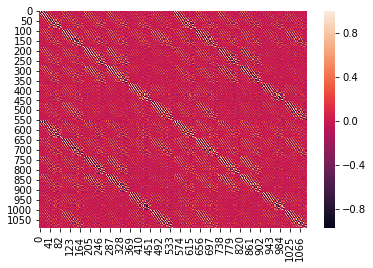

In [74]:
sns.heatmap(x2.corr())

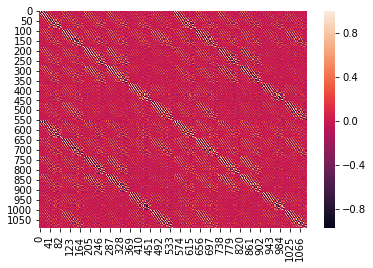

In [66]:
sns.heatmap(x.corr())

In [77]:
list(np.arange(-750,752,10))

[-750,
 -740,
 -730,
 -720,
 -710,
 -700,
 -690,
 -680,
 -670,
 -660,
 -650,
 -640,
 -630,
 -620,
 -610,
 -600,
 -590,
 -580,
 -570,
 -560,
 -550,
 -540,
 -530,
 -520,
 -510,
 -500,
 -490,
 -480,
 -470,
 -460,
 -450,
 -440,
 -430,
 -420,
 -410,
 -400,
 -390,
 -380,
 -370,
 -360,
 -350,
 -340,
 -330,
 -320,
 -310,
 -300,
 -290,
 -280,
 -270,
 -260,
 -250,
 -240,
 -230,
 -220,
 -210,
 -200,
 -190,
 -180,
 -170,
 -160,
 -150,
 -140,
 -130,
 -120,
 -110,
 -100,
 -90,
 -80,
 -70,
 -60,
 -50,
 -40,
 -30,
 -20,
 -10,
 0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750]

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [84]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [116]:
alphas = np.array([10,50,100])
ridgecv = RidgeCV(alphas=alphas, fit_intercept=False, cv=None, scoring ='neg_mean_squared_error')
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 10,  50, 100]), cv=None, fit_intercept=False,
    gcv_mode=None, normalize=False, scoring='neg_mean_squared_error',
    store_cv_values=False)

In [117]:
ridgecv.intercept_

0.0

In [118]:
y_preds = ridgecv.predict(x_test)
y_preds

array([2.37508502e-07, 2.37508502e-07, 2.37508502e-07, ...,
       2.37508502e-07, 2.37508502e-07, 2.37508502e-07])

In [116]:
mean_squared_error(y_test, y_preds)

NameError: name 'y_test' is not defined

In [135]:
x=pd.DataFrame(data=np.random.rand(10,1))
y=.4

auc = ((y-x.mean())/x.std()).values
print(auc)

[-0.4855955]


In [127]:
newdf = pd.DataFrame()
for inds, df in data.groupby(by=['events', 'elecs', 'freqs', 'blockno']):
    tmp = df.iloc[0:751,:]
    break
    tmp = tmp.resample('25ns', on='datetime').mean()
    tmp.reset_index(drop=True, inplace=True)
    newdf = pd.concat([newdf, tmp])
newdf = newdf.round({'time':0})    
newdf.reset_index(drop=True, inplace=True)    

NameError: name 'data' is not defined

In [ ]:
dsrate=15
ds_string = f'{dsrate}ns'


In [33]:
x = pd.DataFrame(np.arange(-750,751,step=2),index=np.arange(1,752), columns=['time'])
x

,time
1,-750
2,-748
3,-746
4,-744
5,-742
6,-740
7,-738
8,-736
9,-734
10,-732


In [48]:
xx = tmp.resample('15ns', on='datetime').mean()
xx = xx.round({'time':0})

In [50]:
t_idx = np.arange(1,126)
t_idx

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125])

In [54]:
xx.loc[(xx['time'].isin(t_idx))]

,events,blockno,elecs,freqs,time,pow,phase,response,view1,view2,view3
datetime,,,,,,,,,,,
1970-01-01 00:00:00.000000000,1.0,1.0,1.0,1.0,8.0,2.389981,-1.849062,2.0,0.509735,0.30005,0.035447
1970-01-01 00:00:00.000000015,1.0,1.0,1.0,1.0,22.0,2.217858,-1.447794,2.0,0.509735,0.30005,0.035447
1970-01-01 00:00:00.000000030,1.0,1.0,1.0,1.0,37.0,2.042263,-1.078791,2.0,0.509735,0.30005,0.035447
1970-01-01 00:00:00.000000045,1.0,1.0,1.0,1.0,52.0,1.884469,-0.760976,2.0,0.509735,0.30005,0.035447
1970-01-01 00:00:00.000000060,1.0,1.0,1.0,1.0,67.0,1.766920,-0.489638,2.0,0.509735,0.30005,0.035447
1970-01-01 00:00:00.000000075,1.0,1.0,1.0,1.0,82.0,1.710398,-0.239011,2.0,0.509735,0.30005,0.035447
1970-01-01 00:00:00.000000090,1.0,1.0,1.0,1.0,97.0,1.719279,0.015471,2.0,0.509735,0.30005,0.035447
1970-01-01 00:00:00.000000105,1.0,1.0,1.0,1.0,112.0,1.786889,0.306289,2.0,0.509735,0.30005,0.035447


In [ ]:
sns.barplot(x='starttime', y='auc_z', hue='startfreq', data=scores)

In [64]:
df

,events,blockno,elecs,freqs,time,pow,phase,response,view1,view2,view3,datetime
0,1,1,1,1,1,2.464962,-2.040536,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000001
35100,1,1,1,1,2,2.453640,-2.010732,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000002
70200,1,1,1,1,3,2.442230,-1.980846,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000003
105300,1,1,1,1,4,2.430764,-1.950999,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000004
140400,1,1,1,1,5,2.419358,-1.921266,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000005
175500,1,1,1,1,6,2.407965,-1.891733,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000006
210600,1,1,1,1,7,2.396432,-1.862377,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000007
245700,1,1,1,1,8,2.384698,-1.833303,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000008
280800,1,1,1,1,9,2.372925,-1.804287,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000009
315900,1,1,1,1,10,2.361011,-1.775453,2,0.509735,0.30005,0.035447,1970-01-01 00:00:00.000000010


In [ ]:
scores.auc_z.dtype

In [ ]:
r1 = data[data['response']==1]

In [ ]:
r1['class']=1
r1['blockno']=1

In [ ]:
keep_pow=False
keep_phase=True

if keep_pow and keep_phase:
    features = 'all'
elif keep_pow and not keep_phase:
    features = 'pow'
elif not keep_pow and keep_phase:
    features= 'phase'  
features    

In [ ]:
def gen_wide_df(df, f_idx, t_idx, keep_pow, keep_phase):
    """

    :param df:
    :param f_idx:
    :param t_idx:
    :return: df
    """

    df = df.loc[(df['time'].isin(t_idx)) & (df['freqs'].isin(f_idx))]

    # z-score within block
    gb = df.groupby(['elecs', 'freqs', 'blockno'])
    if keep_pow:
        df['zpow'] = gb['pow'].apply(zscore)
    if keep_phase:
        df['sin'] = gb['phase'].apply(np.sin)
        df['cos'] = gb['phase'].apply(np.cos)

    df.drop(['pow', 'phase'], inplace=True, axis=1)

    df = pd.pivot_table(df,
                        index=['class', 'blockno', 'events'],
                        columns=['elecs', 'freqs', 'time'],
                        aggfunc=[lambda x: x])

    elecs = df.columns.get_level_values('elecs')
    freqs = df.columns.get_level_values('freqs')
    time = df.columns.get_level_values('time')
    ncol = len(elecs)
    df.reset_index(drop=False, inplace=True)
    return df, elecs, freqs, time, ncol

In [ ]:
df, elecs, freqs, time, ncol = gen_wide_df(r1, list(range(1,14)), list(range(1,125)), keep_pow, keep_phase)

In [ ]:
view_conds = [f'view{x}' for x in range(1,4)]
cond='view1'

In [ ]:
view_conds.append('response')
view_conds.remove(cond)

In [ ]:
view_conds

In [ ]:
data.columns

In [ ]:
cols_to_drop = [f'view{x}' for x in range(1,4)]

In [ ]:
cols_to_drop.append('response')

In [ ]:
cols_to_drop.remove(cond)

In [ ]:
cols_to_drop

In [ ]:
cols_to_drop = [f'view{x}' for x in range(1,4)]+['response']

In [ ]:
cols_to_drop

In [2]:
np.array([10,50,100])

array([ 10,  50, 100])

In [6]:
np.logspace(1,5, 10)

array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])

10.0